# Анализ и тестирование гипотез для интернет-магазина

**Описание проекта:**  

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.   
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.   

**Описание данных:**  
Данные хранятся в трёх датасетах:  
- *hypothesis.csv* - содержит информацию о гипотезах  
- *orders.csv* - содержит информацию о заказах  
- *visitors.csv* - содержит информацию о посещениях сайта  

**Цели исследования:**  
- Приоритизировать гипотезы   
- Проанализировать результаты A/B-теста 
- Принять решение по результатам A/B-теста о дальнейших действиях

**Ход исследования:**  

Проект будет состоять из пяти этапов:  
1. Обзор данных  
2. Предобработка данных  
3. Пририотизация гипотез  
4. Подготовка результатов A/B-теста к анализу 
5. Анализ A/B-теста   

## Обзор данных

### Сохраним данные о гипотезах, заказах и посещениях в переменные:

In [5]:
# импорт библиотек:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# прочитаем csv-файлы и сохраним данные в переменные:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') # гипотезы
orders = pd.read_csv('/datasets/orders.csv') # заказы
visitors =  pd.read_csv('/datasets/visitors.csv')  # посещения

### Выведем первые 5 строк каждого из датафреймов:

In [8]:
# датафрейм hypothesis:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [ ]:
# датафрейм orders:
orders.head()

In [10]:
# датафрейм visitors:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Выведем основную информацию о датафреймах с помощью метода info():

In [11]:
# датафрейм hypothesis:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [12]:
# датафрейм orders:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
# датафрейм visitors:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Исходные данные содержат следующую информацию:  

**hypothesis.csv:**   
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы   

**orders.csv:**  
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ  
  
**visitors.csv:**  
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

На первом этапе выявлены следующие проблемы в исходных данных:  
- нарушения в стиле заголовков в датафреймах *hypothesis* и *orders*
- некорректные типы данных в столбцах с датами  

Устраним пошагово эти проблемы, чтобы подготовить данные к дальнейшему исследованию.

## Предобработка данных

### Работа с заголовками
#### Приведём названия столбцов в датафрейме *hypothesis* к нижнему регистру:

In [14]:
# датафрейм hypothesis:
hypothesis.columns = hypothesis.columns.str.lower()

hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

#### Приведём названия столбцов в датафрейме *orders* к "змеиному стилю":

In [15]:
orders = orders.rename(columns={
                                'transactionId':'transaction_id', 
                                'visitorId': 'visitor_id',
                               })
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

### Работа с типами данных
####  Изменим типы данных в столбцах с датами заказов и посещений:

In [16]:
# преобразование дат в формат datetime:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Работа с пропусками  

#### Проверим, есть ли пропущенные значения в датафреймах:

In [17]:
# датафрейм hypothesis:
hypothesis.isna().sum() 

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [18]:
# датафрейм orders:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [19]:
# датафрейм visitors:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков в исходных данных не обнаружено.  

### Работа с дубликатами
####  Проверим датафреймы на наличие явных дубликатов:

In [20]:
# датафрейм visits:
hypothesis.duplicated().sum() 

0

In [21]:
# датафрейм orders:
orders.duplicated().sum() 

0

In [22]:
# датафрейм visitors:
visitors.duplicated().sum() 

0

Явных дубликатов также не обнаружено.

### Работа с качеством данных
#### Определим, сколько групп участвует в A/B-тесте:

In [23]:
print('Количество групп в A/B-тесте: ', 
      orders['group'].nunique())

Количество групп в A/B-тесте:  2


#### Посчитаем количество пользователей в каждой группе:

In [24]:
# группа А
size_A = orders[orders['group'] == 'A']['visitor_id'].nunique()
print('Количество пользователей в группе А:', size_A)

Количество пользователей в группе А: 503


In [25]:
# группа B
size_B = orders[orders['group'] == 'B']['visitor_id'].nunique()
print('Количество пользователей в группе B:', size_B) 

Количество пользователей в группе B: 586


#### Определим минимальную и максимальную даты исследования:

In [26]:
print('Минимальная дата исследования:', 
      visitors['date'].dt.date.min())

Минимальная дата исследования: 2019-08-01


In [27]:
print('Максимальная дата исследования:', 
      visitors['date'].dt.date.max())

Максимальная дата исследования: 2019-08-31


In [28]:
print('Длительность теста:', 
      visitors['date'].dt.date.max() - visitors['date'].dt.date.min()) 

Длительность теста: 30 days, 0:00:00


A/B-тест проводился в течение всего августа 2019 года. Исследуемый период тестирования составляет 30 дней. 

#### Проверим выборки  пользователей на пересечение  
Чтобы понять, не попадают ли какие-то пользователи в обе группы, применим метод *intersection():*

In [29]:
# сохраним совпадающих пользователей в переменную orders_new
orders_new = orders.groupby('visitor_id').agg({'group': 'nunique'}).query('group > 1').reset_index()
print('Количество пересечений id пользователей в группах:', 
       len(orders_new))

Количество пересечений id пользователей в группах: 58


#### Посчитаем, какую долю от общего количества пользователей в каждой из групп занимают пользователи, присутствующие в обеих группах

In [30]:
print('Доля пересекающихся пользователей по отношению к размеру группы  A: {:.1%}'
      .format(len(orders_new) / size_A))

Доля пересекающихся пользователей по отношению к размеру группы  A: 11.5%


In [31]:
print('Доля пересекающихся пользователей по отношению к размеру группы  B: {:.1%}'
      .format(len(orders_new) / size_B))

Доля пересекающихся пользователей по отношению к размеру группы  B: 9.9%


58 пользователей присутствуют в обеих группах. Доля пересечений для каждой из групп составляет ≈ 10 - 12%.  
Пересечение групп может повлиять на результаты анализа. В реальной практике тест скорее всего пришлось бы проводить заново. Удаление данных о пользователях, попавших в обе группы, с одной стороны целесообразно, так как один и тот же пользователь не может состоять и в тестовой, и в контрольной группах.  

С другой стороны, корректно исключить таких пользователей из датафрейма *visitors* не получится, так как данные в этом датасете агрегированы и пользователей невозможно идентифицировать. Удалять сведения о них только из таблицы *orders* нельзя - данные не будут коррелировать между собой. Поэтому оставим сведения о пользователях без изменений. 

Предобработка данных завершена, переходим к основному исследованию.

## Приоритизация гипотез

В файле *hypothesis.csv* хранятся 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Рассчитаем фреймворки **ICE** и **RICE** для приоритизации гипотез и отсортируем их по убыванию приоритета по следующим формулам:

$$ICE = \frac{Impact * Confidence}{Efforts}$$  

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [32]:
# настроим параметры отображения:
pd.set_option("max_colwidth", 1000)

# фреймворк ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(
    by='ICE', ascending=False).style.background_gradient(cmap='RdYlGn').set_properties(**{'text-align': 'left'})

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Последняя гипотеза - самая перпективная. Затем идут гипотезы 1, 8 и 7.

In [33]:
# настроим параметры отображения:
pd.set_option("max_colwidth", 1000)

# фреймворк RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(
    by='RICE', ascending=False).style.background_gradient(cmap='RdYlGn').set_properties(**{'text-align': 'left'})

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000



При применении **RICE** вместо ICE приоритизация гипотез изменилась - теперь наиболее перпективные гипотезы: 8, 3, 1, 7.  
Метод **ICE** не учитывает параметр *reach* - скольких пользователей затронет изменение, которое хотелось бы внести.  

На первом месте теперь гипотеза №8, так как её параметр *reach* равен 10, в то время как у других гипотез он меньше.  

## Подготовка результатов A/B-теста к анализу

Результаты A/B-теста описаны в датафреймах *orders* и *visitors*.  
Подготовим данные к анализу:

### Посчитаем количество посещений в день для каждой группы:

In [35]:
# группа А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [36]:
# группа В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


### Посчитаем количество посещений в день c накоплением для каждой группы:

In [37]:
# группа А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [38]:
# группа B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


### Посчитаем количество заказов в день и ежедневную выручку для каждой группы:

In [39]:
# группа А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [40]:
# группа B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


### Посчитаем количество заказов и ежедневную выручку с накоплением для каждой группы:

In [41]:
# группа A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [42]:
# группа B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


### Объединим расчёты для каждой из групп в один датафрейм *data*:

In [43]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Объединенный датафрейм *data* теперь содержит:  
- *date* — дату теста;
- *ordersPerDateA* — количество заказов в выбранную дату в группе A;
- *revenuePerDateA* — суммарная выручка в выбранную дату в группе A;
- *ordersPerDateB* — количество заказов в выбранную дату в группе B;
- *revenuePerDateB* — суммарная выручка в выбранную дату в группе B;
- *ordersCummulativeA* — суммарное число заказов до выбранной даты включительно в группе A;
- *revenueCummulativeA* — суммарная выручка до выбранной даты включительно в группе A;
- *ordersCummulativeB* — суммарное количество заказов до выбранной даты включительно в группе B;
- *revenueCummulativeB* — суммарная выручка до выбранной даты включительно в группе B;
- *visitorsPerDateA* — количество пользователей в выбранную дату в группе A;
- *visitorsPerDateB* — количество пользователей в выбранную дату в группе B;
- *visitorsCummulativeA* — количество пользователей до выбранной даты включительно в группе A;
- *visitorsCummulativeB* — количество пользователей до выбранной даты включительно в группе B.

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам:

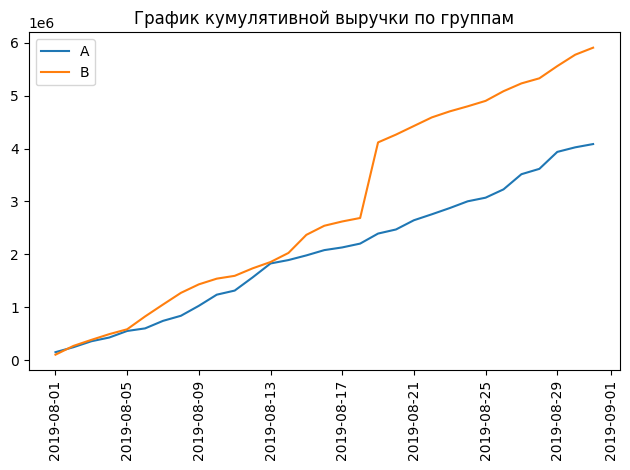

In [44]:
# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=90)
plt.tight_layout()

Выручка в двух группах стабильно увеличивается в течение всего теста.  
Группа В имеет более высокую выручку по сравнению с группой А. Также группе В в нескольких точках график резко растёт. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

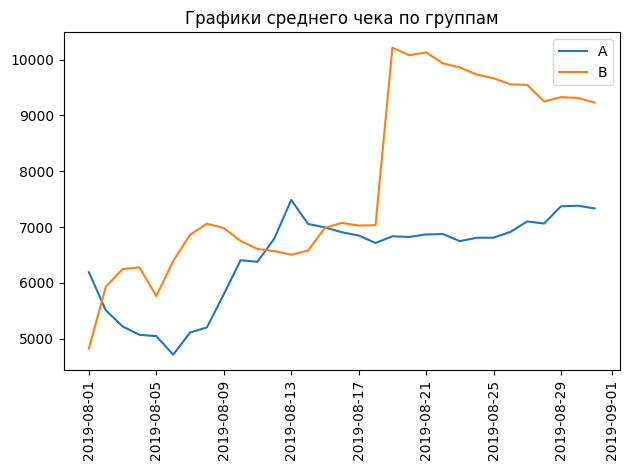

In [45]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

plt.legend()
plt.title('Графики среднего чека по группам')
plt.xticks(rotation=90)
plt.tight_layout()

Средний чек в группе А становится равномерным с середины теста. В группе В график выглядит очень неравномерно: наблюдается большой резкий скачок в середине теста, а затем плавное падение. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

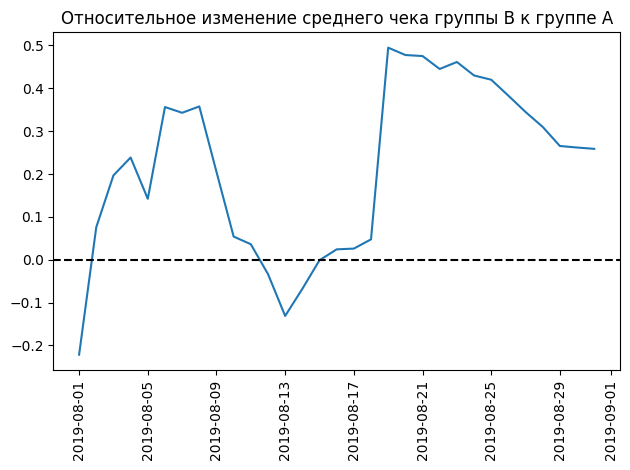

In [46]:
# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.tight_layout()

В нескольких точках график различия между сегментами резко «скачет». Можно сделать вывод, что в данных явно присутствуют крупные заказы и выбросы. Найдём их позже.

### Построим график кумулятивного среднего количества заказов на посетителя по группам:

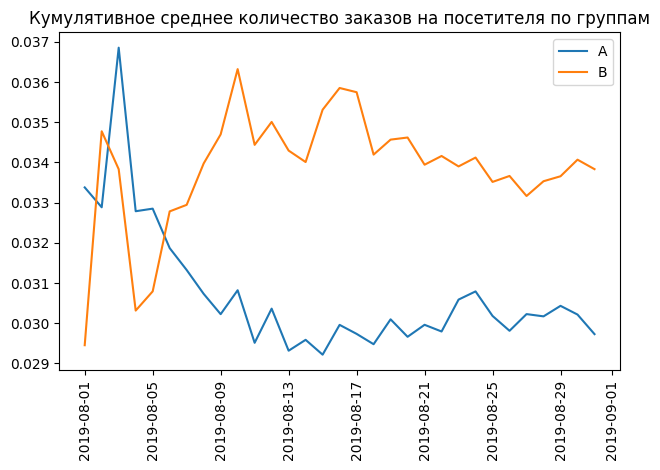

In [47]:
data['conversionA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['conversionB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

# Строим график среднего количества заказов для группы А
plt.plot(data['date'], data['conversionA'], label='A')

# Строим график среднего количества заказов для группы А
plt.plot(data['date'], data['conversionB'], label='B')

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

В начале теста мы видим резкий скачок по среднему количеству заказов в каждой из групп.  
После в группе B налюдается резкий рост показателя и скачкообразное колебание около средних значений, а в группе А резкое падение и нахождение около минимальных значений. 

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

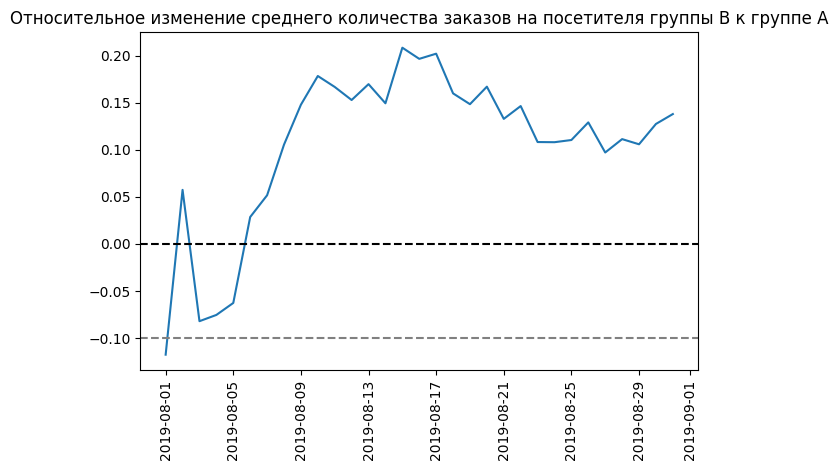

In [48]:
plt.plot(data['date'], data['conversionB']/data['conversionA']-1)

plt.title('Относительное изменение среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()

В начале теста группа B резко вырвалась вперёд, затем также резко упала почти до минимальных значений. После снова наблюдался резкий значительный рост по среднему количеству заказов и стабильное лидерство по отношению в группе А.  

Однако, сейчас делать какие-либо выводы по тесту нельзя, так как стоит проанализировать аномалии. Возможно, они изменят картину.

### Построим точечный график количества заказов по пользователям:

In [49]:
# считаем количество заказов по пользователям:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
                )

orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


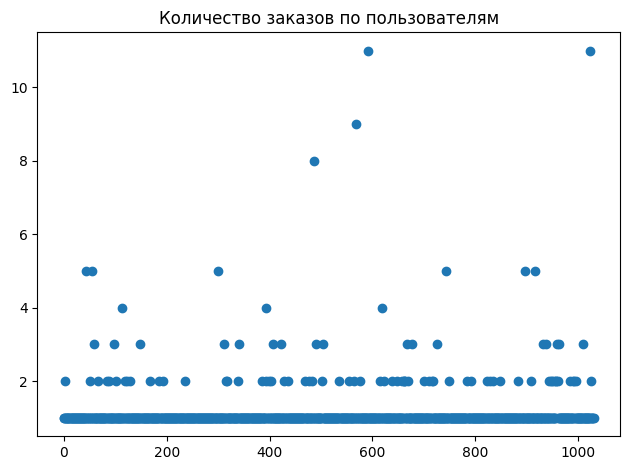

In [50]:
# Строим точечный график числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Количество заказов по пользователям')
plt.tight_layout()

Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Это значительно больше, чем заказывает обычный пользователь за месяц. 
Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.

### Посчитаем выборочные перцентили количества заказов на одного пользователя (95-й и 99-й):

In [51]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли более двух заказов. И всего 1% пользователей заказывали более четырёх раз.   
Разумно будет выбрать **2 заказа** на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов:

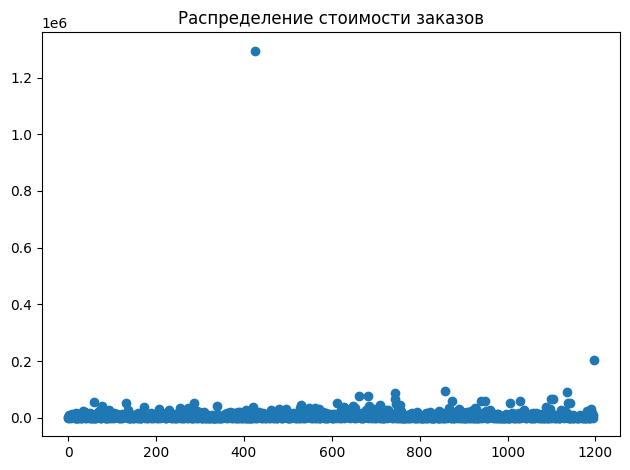

In [52]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.tight_layout()

По графику видно, что стоимость заказов по большей части однородная, дорогих заказов всего несколько.

### Посчитаем выборочные перцентили стоимости заказов (95-й и 99-й):

In [53]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей.  
Выберем стоимость **28 000** рублей за верхнюю границу стоимости заказов, и отсеим аномальных пользователей по ней.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным (с аномалиями)

Сформулируем гипотезы:  
**Нулевая:** различий в среднем количестве заказов между группами нет.  
**Альтернативная:** различия в среднем количестве заказов между группами есть.

#### Создадим переменные *orders_by_usersA* и *orders_by_usersB*  
В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:

In [54]:
# количество заказов по пользователям, группа А
orders_by_usersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_usersA.columns = ['user_id', 'orders']
orders_by_usersA.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [55]:
# количество заказов по пользователям, группа В
orders_by_usersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_usersB.columns = ['user_id', 'orders']
orders_by_usersA.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


### Проверим тестируемые данные на нормальность распределения  
Проверку проведем для данных о заказах и выручке, используя метод *stats.shapiro()*.  

Сформулируем гипотезы для проверки распределения в данных о заказах:  
**Нулевая:** данные о заказах имеют нормальное распределение.  
**Альтернативная:** данные о заказах распределены не нормально.  

In [56]:
alpha = 0.05  # критический уровень статистической значимости

# проверка распределения в группе А
results = stats.shapiro(orders_by_usersA)

print('p-значение: ', results[1]) # второе значение в массиве результатов (с индексом 1) - p-value

if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  1.7246588514241297e-35
Отвергаем нулевую гипотезу: распределение не нормально


In [57]:
# проверка распределения в группе В
results = stats.shapiro(orders_by_usersB)

print('p-значение: ', results[1])

if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  4.3515266703461565e-38
Отвергаем нулевую гипотезу: распределение не нормально


Сформулируем гипотезы для проверки распределения в данных о выручке:    
**Нулевая:** данные о выручке имеют нормальное распределение.  
**Альтернативная:** данные о выручке распределены не нормально.

In [58]:
# проверка на нормальность распределения для данных о выручке, группа А
results = stats.shapiro(orders[orders['group']=='A']['revenue'])

print('p-значение: ', results[1])
if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


In [59]:
# проверка на нормальность распределения для данных о выручке, группа B
results = stats.shapiro(orders[orders['group']=='B']['revenue'])

print('p-значение: ', results[1])

if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


По результатам четырех тестов распределение не является нормальным ни в одной из тестируемых групп.  
Это означает, что в данных есть большие (по сравнению с нормальным распределением) выбросы. В таком случае, для дальнейшего расчёта статистической значимости прибегнем к непараметрическому тесту Уилкоксона-Манна-Уитни.

#### Объявим переменные *sampleA* и *sampleB*  
Переменные будут состоять из двух частей:
- Список с количеством заказов для каждого из пользователей  
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.  

In [60]:
# количество заказов, группа А
sampleA = pd.concat(
    [orders_by_usersA['orders'],
     pd.Series(0, index=np.arange(
         data['visitorsPerDateA'].sum() - len(orders_by_usersA['orders'])), name='orders')],axis=0)

sampleA.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
Name: orders, dtype: int64

In [61]:
# количество заказов, группа В
sampleB = pd.concat(
    [orders_by_usersB['orders'],
     pd.Series(0, index=np.arange(
         data['visitorsPerDateB'].sum() - len(orders_by_usersB['orders'])), name='orders')],axis=0)

sampleB.value_counts()

0    18330
1      552
2       23
3        5
4        4
5        1
6        1
Name: orders, dtype: int64

#### Посчитаем p-value и выведем относительный прирост среднего числа заказов группы B
Для этого среднее число заказов группы B разделим на среднее число заказов группы A - 1.  
Округлим значение до трёх знаков после запятой:

In [62]:
print('P-value: '
      "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print('Относительный прирост среднего числа заказов группы B: '
      "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value: 0.017
Относительный прирост среднего числа заказов группы B: 0.138


По «сырым» данным различия в среднем числе заказов групп A и B есть.   
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B равен 13.8%.  

### Проверим статистическую значимость различий в среднем чеке  по «сырым» данным (с аномалиями)  

Сформулируем гипотезы:  
**Нулевая:** различий в среднем чеке между группами нет.   
**Альтернативная:** различия в среднем чеке между группами есть.  


Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию *mannwhitneyu()* данные о выручке с заказов.  
Также найдём относительные различия в среднем чеке между группами: 

In [63]:
print('P-value: ''{0:.3f}'.format(
       stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                          orders[orders['group']=='B']['revenue'], 
                          alternative='two-sided')[1]))

print('Относительные различия в среднем чеке между группами: ''{0:.3f}'.format(
       orders[orders['group']=='B']['revenue'].mean()
       /orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительные различия в среднем чеке между группами: 0.259


P-value значительно больше 0.05. Несмотря на большой показатель различия между группами (25.9%), причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

### Изучим аномальные значения
Сделаем срезы пользователей с числом заказов больше 2  и сохраним в переменную *users_with_many_orders* и пользователей, совершивших заказы дороже 28 000 — *users_with_expensive_orders*. Объединим их в таблице *abnormal_users:*

In [64]:
users_with_many_orders = pd.concat(
    [
        orders_by_usersA[orders_by_usersA['orders'] > 4]['user_id'],
        orders_by_usersB[orders_by_usersB['orders'] > 4]['user_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 20000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users.head(5)

568     113298937
1099    148427295
461     154576532
928     204675465
684     358944393
dtype: int64

Узнаем, сколько всего аномальных пользователей атрибутом *shape*:

In [65]:
print('Количество аномальных пользователей: {}'
      .format(abnormal_users.shape[0]))

Количество аномальных пользователей: 86


Всего выявлено 86 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. 

### Очистим данные от аномальных значений   
Подготовим выборки количества заказов по пользователям:

In [66]:
# очищенные данные, группа А
sampleA_filtered = pd.concat(
    [
        orders_by_usersA[
            np.logical_not(orders_by_usersA['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_usersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [67]:
# очищенные данные, группа В
sampleB_filtered = pd.concat(
    [
        orders_by_usersB[
            np.logical_not(orders_by_usersB['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_usersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным  

Сформулируем гипотезы:  
**Нулевая:** различий в среднем количестве заказов между группами нет.  
**Альтернативная:** различия в среднем количестве заказов между группами есть.

In [68]:
print('P-value: '
      '{0:.3f}'.format(stats.mannwhitneyu(sampleA_filtered, 
                                          sampleB_filtered,
                                          alternative='two-sided')[1]))

print('Относительный прирост среднего числа заказов группы B: '
      '{0:.3f}'.format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

P-value: 0.023
Относительный прирост среднего числа заказов группы B: 0.149


P-value незначительно увеличился (+0.006), как и разница между группами - с 13.8% до 14.9%.   
Гипотеза о том, что статистически значимых различий в среднем числе заказов между группами нет, снова отвергнута.  
Проверим, произошло ли что-нибудь с результатами по среднему чеку.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным  
Сформулируем гипотезы:  
**Нулевая:** различий в среднем чеке между группами нет.   
**Альтернативная:** различия в среднем чеке между группами есть.  

In [69]:
print('P-value: ''{0:.3f}'.format(
       stats.mannwhitneyu(
           orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
                ]['revenue'],
           orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
                ]['revenue'],
           alternative='two-sided'
       )[1]
    )
)

print('Относительные различия в среднем чеке между группами: '"{0:.3f}".format(
       orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.866
Относительные различия в среднем чеке между группами: -0.002


P-value увеличился на 0.137, относительные различия в среднем чеке между группами значительно сократились: с 25.9% до 0.2%.   
Нулевая гипотеза об отсутствии различий в среднем чеке между группами, снова не отвергута.  

**Выводы по тесту:**  
- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий  
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий  
- График различия среднего количества заказов между группами сообщает, что результаты группы B стабильно лучше группы A    
- График различия среднего чека говорит о том, что результаты группы B начиная с середины теста стабильно лучше группы А и сейчас разница составляет 15%  

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B в чем-то хуже сегмента A — практически нулевая.